In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('New_HR_dataset.csv', delimiter=',')
df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,WD,LastAssessedDate
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Exceeds,4.60,5,0,2019-01-17,0,1,40,0,0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Fully Meets,4.96,3,6,2016-02-24,0,17,48,444,113
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Fully Meets,3.02,3,0,2012-05-15,0,3,35,447,132
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Fully Meets,4.84,5,0,2019-01-03,0,15,35,0,0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Fully Meets,5.00,4,0,2016-02-01,0,2,34,1884,218


# **0. 재직중인, 퇴직한 직원 데이터프레임 생성**

퇴직한 직원과 재직중인 직원을 구분하여 판단하기로 함

In [4]:
# 재직중인 직원 데이터프레임
active_df = df[df['EmploymentStatus'] == 'Active']
active_df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,WD,LastAssessedDate
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Exceeds,4.60,5,0,2019-01-17,0,1,40,0,0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Fully Meets,4.84,5,0,2019-01-03,0,15,35,0,0
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Exceeds,5.00,5,0,2019-01-07,0,15,46,0,0
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Fully Meets,3.04,3,4,2019-01-02,0,19,44,0,0
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Fully Meets,5.00,4,0,2019-02-25,0,19,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Wolk, Hang T",10174,0,0,0,1,5,3,0,60446,...,Fully Meets,3.40,4,0,2019-02-21,0,14,38,0,0
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Fully Meets,4.07,4,0,2019-02-28,0,13,38,0,0
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Exceeds,4.60,5,6,2019-02-21,0,16,44,0,0
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Fully Meets,5.00,3,5,2019-02-01,0,11,44,0,0


In [5]:
# 퇴직한 직원 데이터프레임
notactive_df = df[df['EmploymentStatus'] != 'Active']
notactive_df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,WD,LastAssessedDate
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Fully Meets,4.96,3,6,2016-02-24,0,17,48,444,113
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Fully Meets,3.02,3,0,2012-05-15,0,3,35,447,132
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Fully Meets,5.00,4,0,2016-02-01,0,2,34,1884,218
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,Fully Meets,4.20,4,0,2016-01-30,0,12,50,2194,348
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,Fully Meets,4.20,3,0,2016-05-06,0,15,49,1631,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,"Wilber, Barry",10048,1,1,1,5,5,3,0,55140,...,Fully Meets,5.00,3,0,2015-02-15,0,7,58,1575,204
302,"Wilkes, Annie",10204,0,2,0,5,5,3,0,58062,...,Fully Meets,3.60,5,0,2011-02-06,0,9,40,490,463
303,"Williams, Jacquelyn",10264,0,0,0,5,5,3,1,59728,...,Fully Meets,4.30,4,0,2014-06-02,0,16,54,1265,390
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Exceeds,5.00,3,0,2016-01-19,0,7,65,1140,33


C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\2825142885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EmploymentStatus', data=df, palette='pastel')


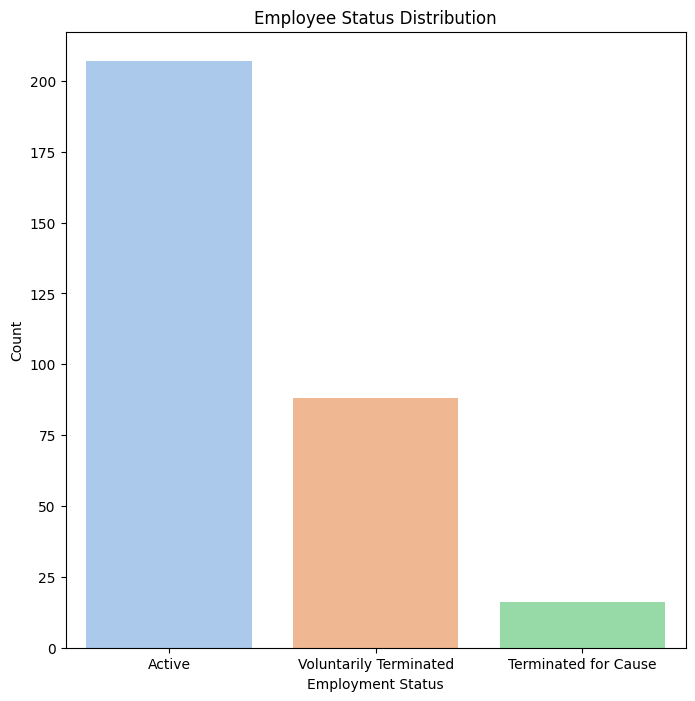

In [6]:
# Active와 Not Active의 개수를 카운트
status_counts = df['EmploymentStatus'].value_counts()

# 시각화
plt.figure(figsize=(8, 8))
sns.countplot(x='EmploymentStatus', data=df, palette='pastel')

plt.title('Employee Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')

plt.show()

현재 근무 중인 직원이 가장 많고, 그 다음으로 자발적 퇴사가 높은 수치를 보이며, 세 번째로는 원인에 의한 해고가 나타납니다.

이로 인해 전체적인 분위기는 특별히 많은 퇴사가 이뤄지지 않는 것으로 판단됩니다. 현재 근무 중인 직원 수가 퇴사한 직원 수보다 약 두 배 정도 높아 전반적으로 안정된 업무 환경이 유지되고 있는 것으로 생각됩니다.

# **1. 회사의 부서 구조 알아보기**

## **직책 확인하기**

### **직책 파악**

가장 먼저 직원의 직책을 확인해야 그 직원이 현재 어떤 위치에 있는지를 파악할 수 있음

각 직원의 Position 파악

In [7]:
# 각 부서별 직원 수 계산
position_count = active_df['Position'].value_counts()

# 결과 출력
position_count

Position
Production Technician I         85
Production Technician II        31
Area Sales Manager              23
Production Manager               9
IT Support                       8
Data Analyst                     6
Software Engineer                6
Sr. Network Engineer             5
Network Engineer                 4
BI Developer                     4
Senior BI Developer              3
Accountant I                     3
Database Administrator           2
Sales Manager                    2
Sr. Accountant                   2
Director of Operations           1
BI Director                      1
IT Manager - Support             1
Sr. DBA                          1
IT Director                      1
Software Engineering Manager     1
Director of Sales                1
President & CEO                  1
Shared Services Manager          1
IT Manager - Infra               1
Data Architect                   1
IT Manager - DB                  1
Administrative Assistant         1
CIO        

1. **Production Technician I 및 Production Technician II:**
    - Production Technician I가 85명, Production Technician II가 31명으로 가장 많은 직책입니다.
    - 생산 기술 직무에 종사하는 인원이 많음을 나타냅니다.
2. **Area Sales Manager:**
    - 23명의 Area Sales Manager가 있습니다.
    - 영업 분야에 종사하는 인원이 있음을 나타냅니다.
3. **Production Manager:**
    - 9명의 Production Manager가 있습니다.
    - 생산 관리자 역할을 하는 인원이 있음을 나타냅니다.
4. **IT Support, Data Analyst, Software Engineer:**
    - IT Support, Data Analyst, Software Engineer 등 다양한 IT 관련 직무가 있습니다.
    - IT 부문에서 다양한 역할에 종사하는 인원이 있음을 나타냅니다.
5. **다양한 다른 직책들:**
    - BI Developer, Senior BI Developer, Accountant, Database Administrator, Sales Manager, Network Engineer 등 다양한 직책들이 존재합니다.
6. **단일 인원을 갖는 직책들:**
    - Director of Operations, BI Director, IT Manager - Support, Sr. DBA, IT Director, Software Engineering Manager, Director of Sales, President & CEO, Shared Services Manager, IT Manager - Infra, Data Architect, IT Manager - DB, Administrative Assistant, CIO 등이 해당됩니다.

7. **결론:**
    - Production Technician I, Production Technician II는 가장 낮은 직책이라고 판단되며
    - Area Sales Manager, Production Manager는 매니저 직책이라고 판단됩니다.
    - 또한 소수인원의 직책이 많은 것으로 판단됩니다.

C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\1137129145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Position', data=active_df, palette='pastel', order=position_count.index)


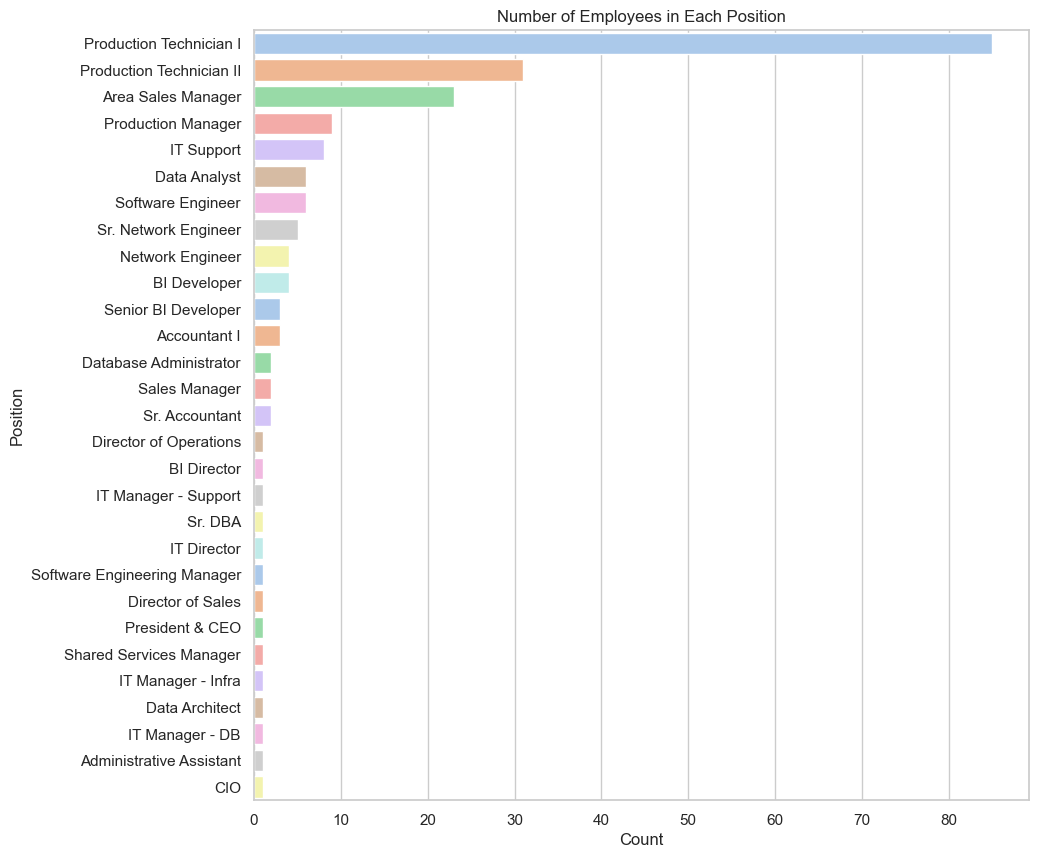

In [8]:
# 시각화
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
sns.countplot(y='Position', data=active_df, palette='pastel', order=position_count.index)

plt.title('Number of Employees in Each Position')
plt.xlabel('Count')
plt.ylabel('Position')

plt.show()

### **직책별 연봉 파악**

In [9]:
# Position 별 평균 연봉 계산
average_salary_position = active_df.groupby('Position')['Salary'].mean()

salary_data = (average_salary_position* 1335.47).round(0).astype(int).sort_values(ascending=False)

salary_data

Position
President & CEO                 333867500
CIO                             294404362
Director of Sales               240384600
IT Director                     237713660
Director of Operations          227697635
IT Manager - Infra              209668790
Data Architect                  200707786
IT Manager - DB                 188194432
IT Manager - Support            185480757
BI Director                     148142352
Sr. Accountant                  137365109
Database Administrator          136016952
Sr. DBA                         133588400
Software Engineer               128015038
BI Developer                    127490644
Sr. Network Engineer            124293261
Shared Services Manager         124260142
Data Analyst                    119398808
Senior BI Developer             113251417
Software Engineering Manager    103755335
Production Manager               97754920
Sales Manager                    92628867
Production Technician II         86949867
Area Sales Manager       

1. **President & CEO와 CIO:**
    - 회사의 최고 경영진인 President & CEO와 CIO의 연봉이 가장 높게 나타났습니다.
2. **IT 및 데이터 분야:**
    - IT 및 데이터 관련 직책인 IT Director, IT Manager - Infra, Data Architect 등의 연봉이 상위에 위치하고 있습니다.
3. **영업 및 운영 분야:**
    - 영업과 운영 분야의 직책인 Director of Sales, Director of Operations의 연봉도 높은 편에 속합니다.
4. **관리자 및 경영진:**
    - 경영진이나 관리자로서의 역할을 하는 직책들 (BI Director, Sr. Accountant, Database Administrator, Sr. DBA 등)의 연봉도 높게 나타납니다.
5. **생산 및 영업 직무:**
    - 생산 및 영업 직무에 종사하는 직책들 (Production Manager, Sales Manager, Production Technician 등)의 연봉이 중간 정도로 분포되어 있습니다.

C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\486106008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_data.values, y=salary_data.index, palette='pastel')


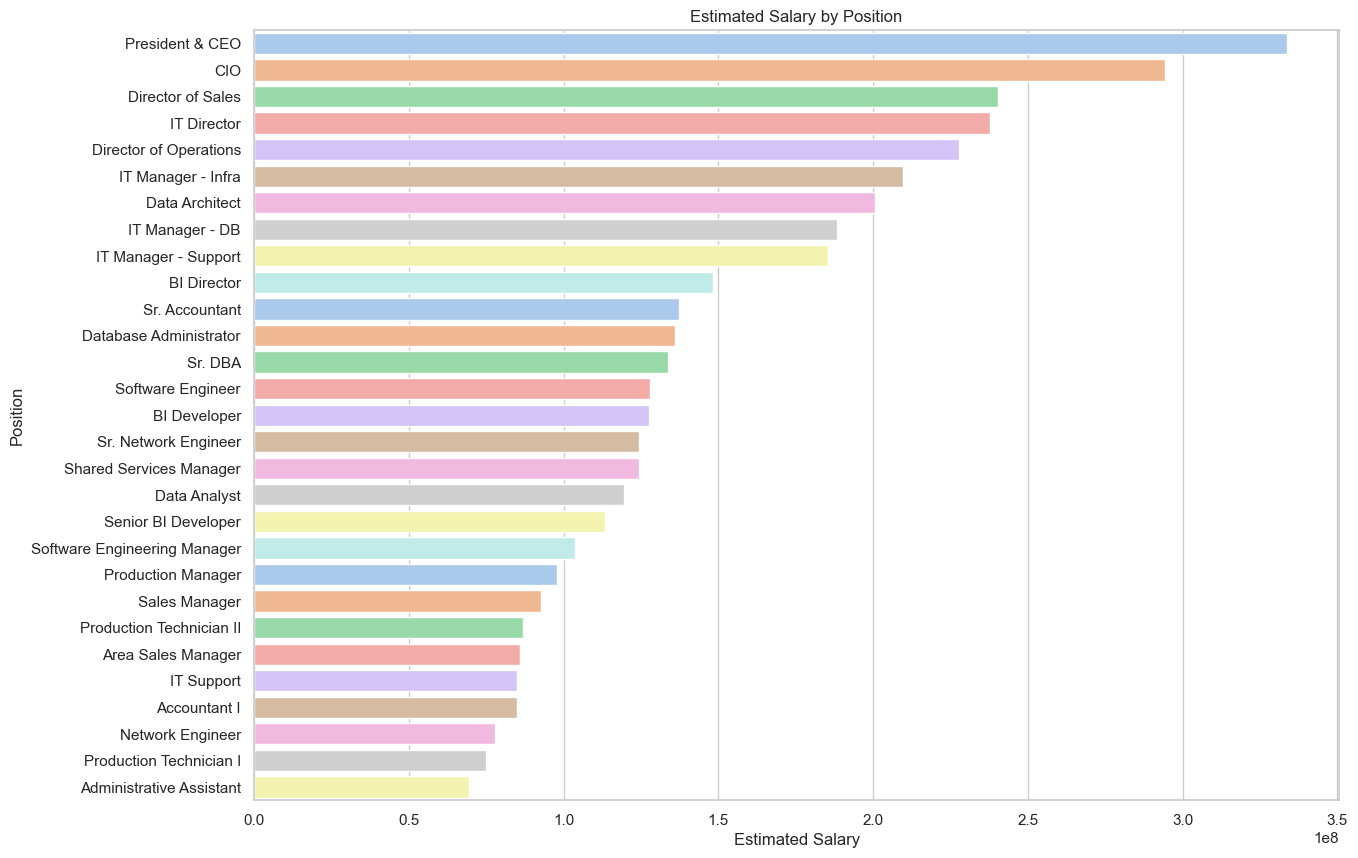

In [10]:
# 시각화
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
sns.barplot(x=salary_data.values, y=salary_data.index, palette='pastel')

plt.title('Estimated Salary by Position')
plt.xlabel('Estimated Salary')
plt.ylabel('Position')

plt.show()

**직원별 연봉 파악**

C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\19556775.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Salary', y='Position', data=active_df, palette='pastel', s=100)


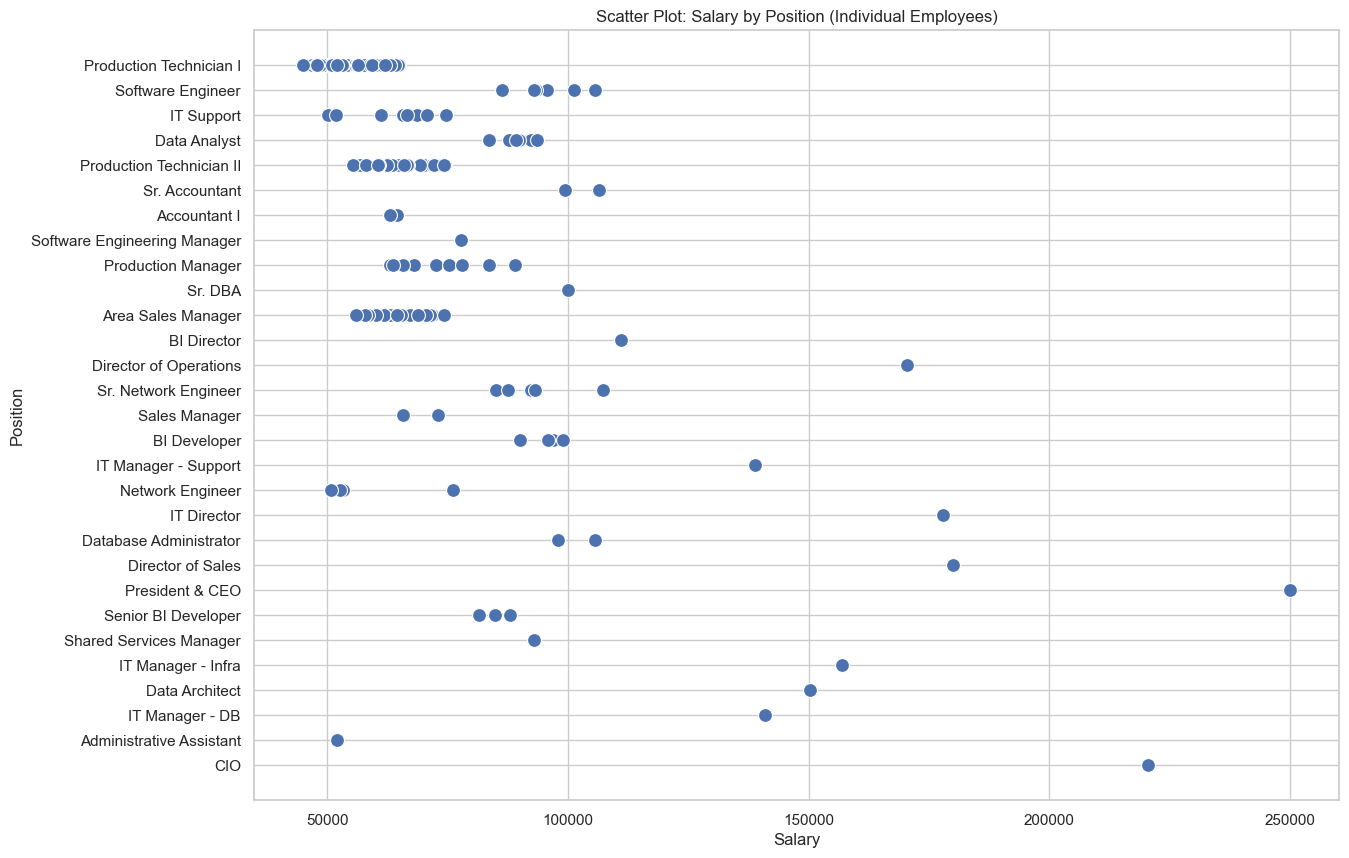

In [11]:
# scatterplot시각화
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

sns.scatterplot(x='Salary', y='Position', data=active_df, palette='pastel', s=100)

plt.title('Scatter Plot: Salary by Position (Individual Employees)')
plt.xlabel('Salary')
plt.ylabel('Position')

plt.show()

C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\1083864182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Salary', y='Position', data=active_df, palette='pastel')


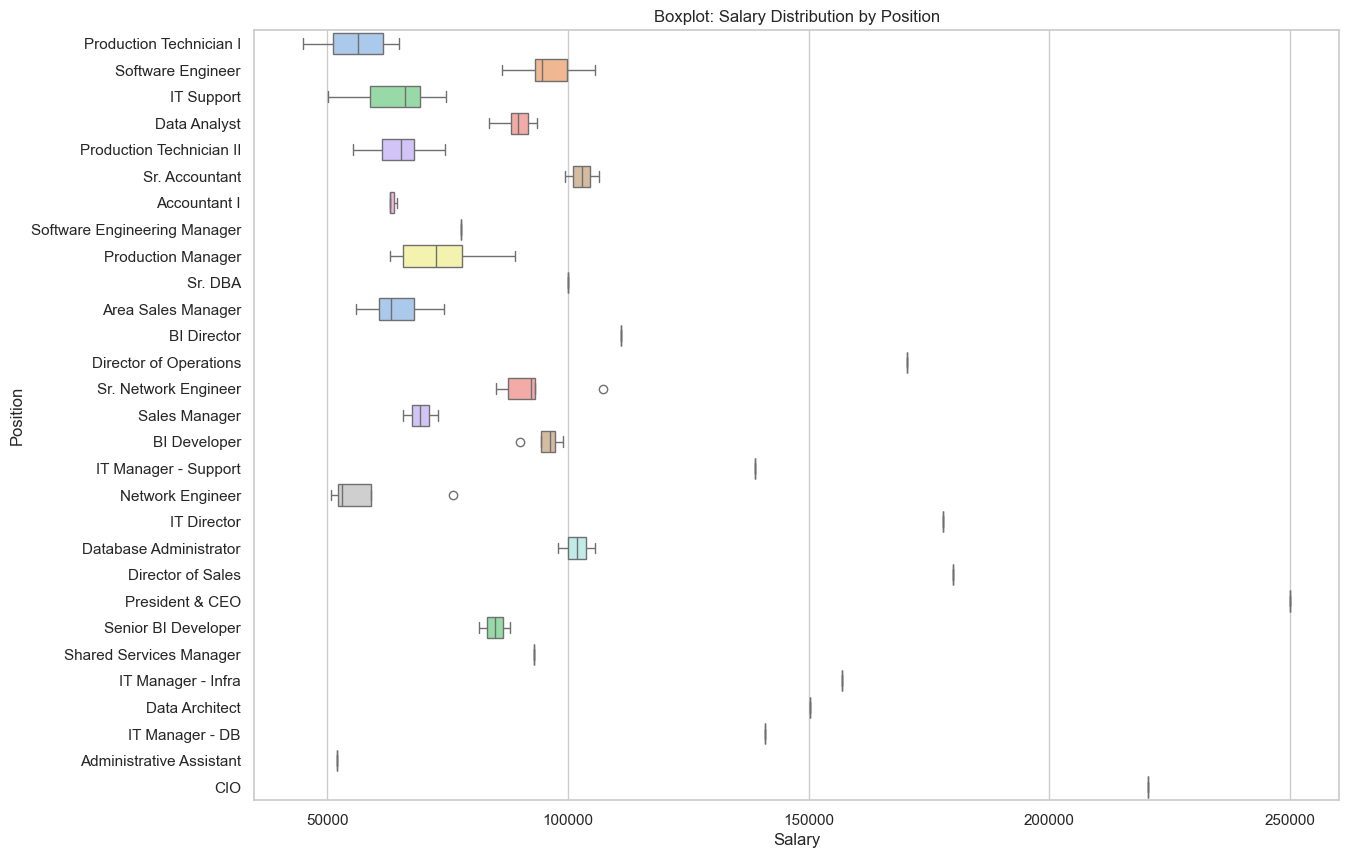

In [12]:
# boxplot시각화
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

sns.boxplot(x='Salary', y='Position', data=active_df, palette='pastel')

plt.title('Boxplot: Salary Distribution by Position')
plt.xlabel('Salary')
plt.ylabel('Position')

plt.show()

**직원별 부서 파악**

In [13]:
position_department = df.groupby(['Position', 'Department']).size().reset_index(name='Count')

position_department

,Position,Department,Count
0,Accountant I,Admin Offices,3
1,Administrative Assistant,Admin Offices,3
2,Area Sales Manager,Sales,27
3,BI Developer,IT/IS,4
4,BI Director,IT/IS,1
5,CIO,IT/IS,1
6,Data Analyst,IT/IS,7
7,Data Analyst,IT/IS,1
8,Data Architect,IT/IS,1
9,Database Administrator,IT/IS,5


C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\1961714241.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\1961714241.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\1961714241.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\1961714241.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. 

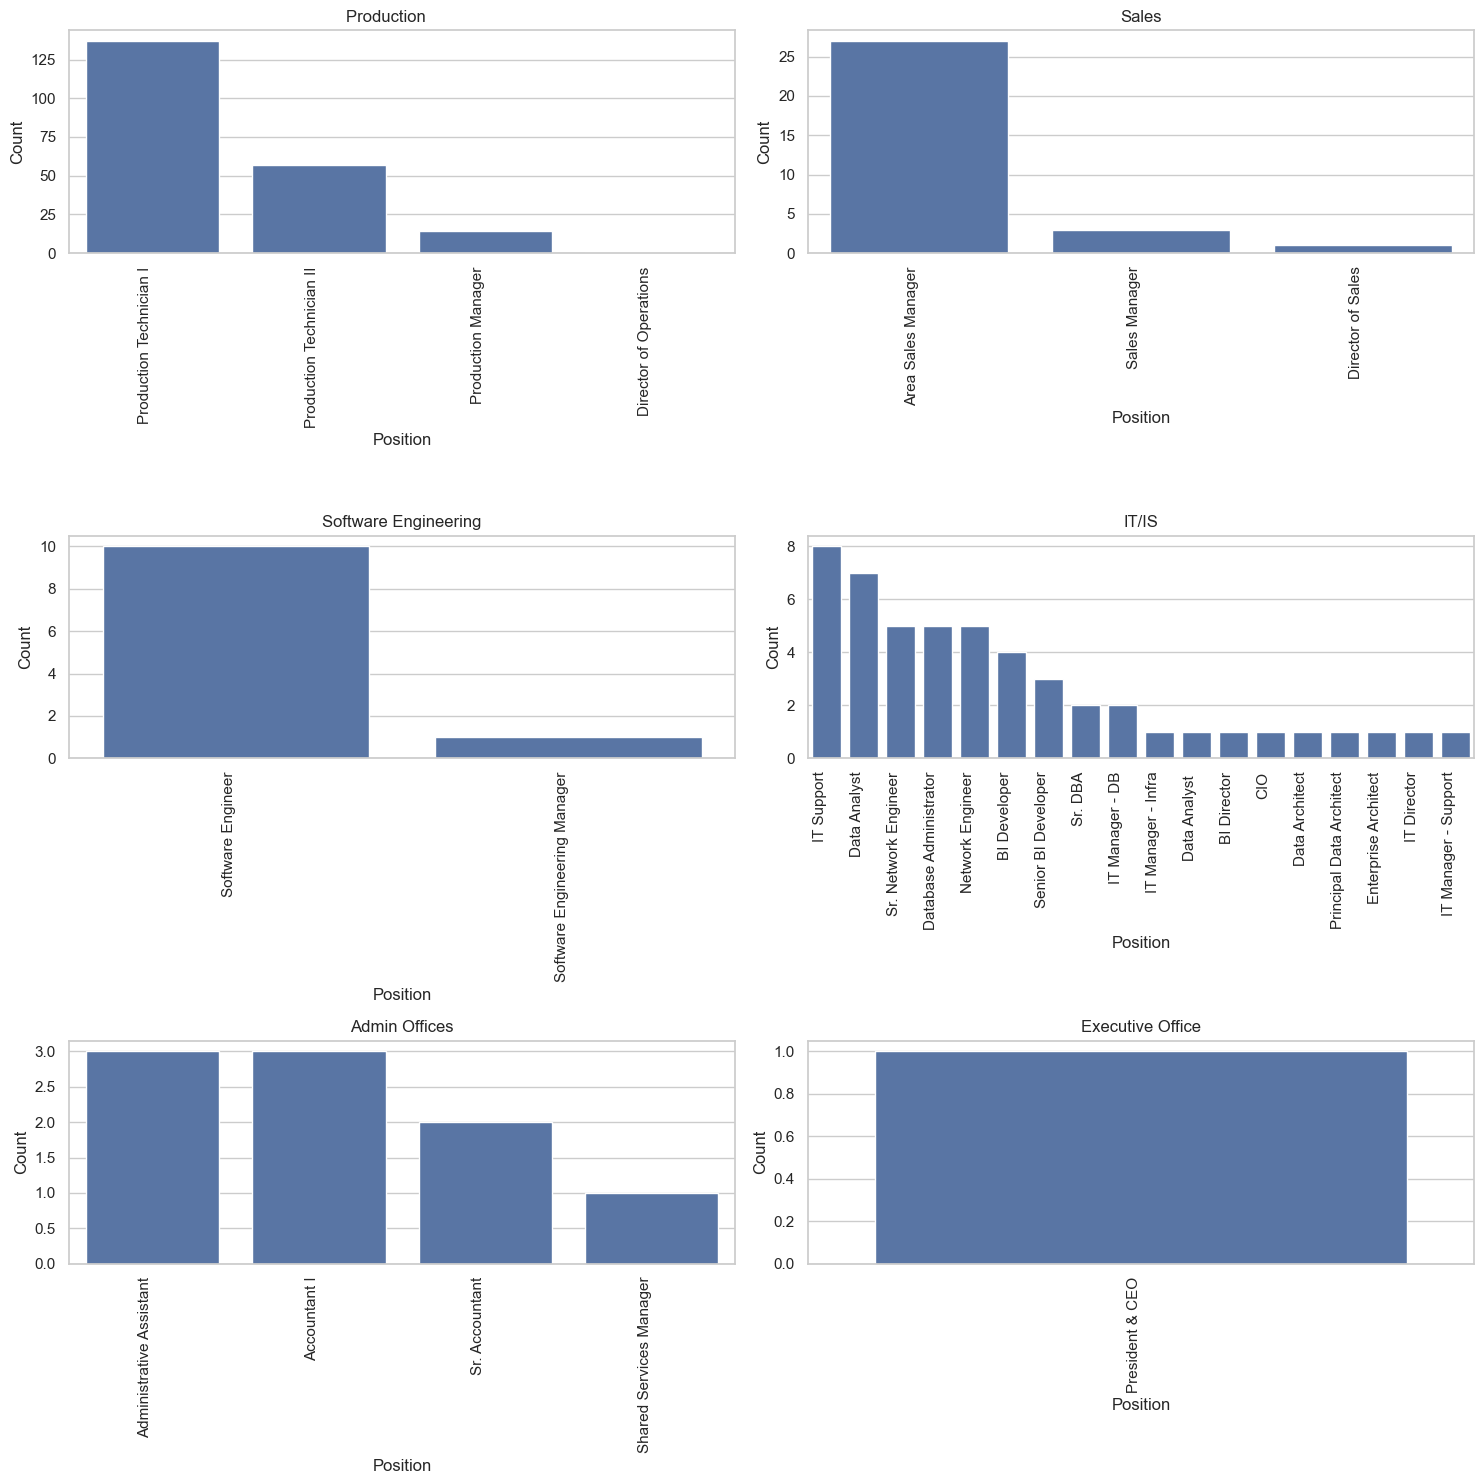

In [14]:
import math

# 데이터 프레임 생성
position_department = df.groupby(['Position', 'Department']).size().reset_index(name='Count')

# 직책별로 연봉 순서대로 정렬
sorted_data = position_department.sort_values(by='Count', ascending=False)

# Seaborn 설정
sns.set(style="whitegrid")

# 부서 목록 가져오기
departments = sorted_data['Department'].unique()

# 서브플롯 설정
fig, axes = plt.subplots(math.ceil(len(departments) / 2), 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# 각 부서별로 서브플롯에 직책별 연봉 그래프 그리기
for i, department in enumerate(departments):
    row = i // 2
    col = i % 2
    subset = sorted_data[sorted_data['Department'] == department]
    plot = sns.barplot(x='Position', y='Count', data=subset, ax=axes[row, col])
    plot.set_title(f'{department}')

    # x축 레이블 90도 회전
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')

# 그래프 여백 최적화
plt.tight_layout()

# 그래프 보이기
plt.show()

이제 직책과 연봉과 인원수로 각 부서에 어떤 직무와 직책이 있는지 판단해 보겠다.

우선 각 부서별 직급이 제일 높은 사람이다. **Sales**와 **Position**을 비교하여 판단하여서 오류가 발생할 수 도 있다.

1. **Admin Offices:** Shared Services Manager
2. **Sales:** Area Sales Manager
3. **IT/IS (Information Technology/Information Systems):** CIO
4. **Production:** Director of Operations
5. **Executive Office:** President & CEO
6. **Software Engineering:** Software Engineering Manager

각 부서별로 파악해보겠다.

**Admin Offices:**

1. Shared Services Manager (1)
2. Sr. Accountant (2)
3. Accountant I (3)
4. Administrative Assistant (3)

**Sales:**

1. Area Sales Manager (27)
2. Sales Manager (3)
3. Director of Sales (1)

**IT/IS (Information Technology/Information Systems):**

1. CIO (1)
2. BI Director (1)
3. IT Director (1)
4. Enterprise Architect (1)
5. Principal Data Architect (1)
6. Software Engineering Manager (1)
7. Director of Operations (1)
8. IT Manager - DB (2)
9. IT Manager - Infra (1)
10. IT Manager - Support (1)
11. Senior BI Developer (3)
12. Sr. DBA (2)
13. Network Engineer (5)
14. Sr. Network Engineer (5)
15. Data Architect (1)
16. Database Administrator (5)
17. IT Support (8)
18. BI Developer (4)
19. Data Analyst (8)

**Production:**

1. Director of Operations (1)
2. Production Manager (14)
3. Production Technician II (57)
4. Production Technician I (137)

**Software Engineering:**

1. Software Engineer Manager: (1)
2. Software Engineering Manager: (10)

**Executive Office:**

1. President & CEO: (1)

각 부서에서 상위의 직책을 가진 직원들은 대부분 Director나 Manager라는 명칭이 들어가는 것으로 파악

# **2. 각 컬럼이 승진에 미치는 영향 시각화**

## **승진 파악 기준 확인하기**

1. **근속 기간 계산:**
    - "DateofHire"를 사용하여 각 직원의 현재 근속 기간을 계산.
    - 계산된 근속 기간을 새로운 컬럼으로 추가.
2. **직책 확인 및 평가:**
    - 현재 직책("Position")이 "Manager" 또는 "Director"와 같은 단어를 포함하는지 확인.
    - 해당 직책에 속하는 직원들의 "PerformanceScore," "EngagementSurvey," "EmpSatisfaction," "SpecialProjectsCount"의 점수 합산을 계산.
    - 부정적인 영향을 미칠 수 있는 "DaysLateLast30"와 "Absences"를 파악.
3. **평가 기준이 개인 신상과 관련:**
    - 직책이 "Manager" 또는 "Director"인 사람들의 인종 분포와 성별 분포를 확인.
    - 특정 인종이나 특정 성별이 과포집되어 있는지 확인.
4. **결과 정리:**
    - 계산된 근속 기간에 따라서, 직책이 "Manager" 또는 "Director"인 사람들의 긍정적인 요소와 부정적인 요소를 정리.
    - 결과를 시각적으로 나타내어 각 근속 기간 범주에서의 평가 기준 차이를 확인.

**가장 최근 입사한 직원의 DateofHire - DateofHire을 통해 가상으로 근속 기간을 계산.**

In [15]:
#"DateofHire" 컬럼을 날짜형으로 변환
active_df['DateofHire'] = pd.to_datetime(active_df['DateofHire'])

# 가장 최근 입사한 직원의 DateofHire를 가져오기
latest_hire_date = active_df['DateofHire'].max()

# 근속 기간 계산
active_df['Length_of_Service_Day'] = ((latest_hire_date - active_df['DateofHire']).dt.days)
active_df['Length_of_Service'] = ((latest_hire_date - active_df['DateofHire']).dt.days / 365).round(1)

active_df.head(5)

C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\3960398352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_df['DateofHire'] = pd.to_datetime(active_df['DateofHire'])
C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\3960398352.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_df['Length_of_Service_Day'] = ((latest_hire_date - active_df['DateofHire']).dt.days)
C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\3960398352.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,WD,LastAssessedDate,Length_of_Service_Day,Length_of_Service
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,5,0,2019-01-17,0,1,40,0,0,2561,7.0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,5,0,2019-01-03,0,15,35,0,0,3836,10.5
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,5,0,2019-01-07,0,15,46,0,0,2373,6.5
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,3,4,2019-01-02,0,19,44,0,0,1337,3.7
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,4,0,2019-02-25,0,19,40,0,0,1743,4.8


In [16]:
active_df['Length_of_Service']

0       7.0
3      10.5
5       6.5
6       3.7
7       4.8
       ... 
305     3.8
306     4.0
308     8.3
309     3.3
310     3.8
Name: Length_of_Service, Length: 207, dtype: float64

**active_df에서 Position에 "Manager" 또는 "Director"가 포함되는 데이터프레임만 새로 생성**

In [17]:
manager_director_df = active_df[active_df['Position'].str.contains('Manager|Director')]

manager_director_df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,WD,LastAssessedDate,Length_of_Service_Day,Length_of_Service
35,"Cady, Max",10150,0,0,1,1,4,3,0,77692,...,3,5,2019-01-21,0,4,57,0,0,2520,6.9
36,"Candie, Calvin",10001,0,0,1,1,5,4,0,72640,...,3,0,2019-02-22,0,14,40,0,0,893,2.4
40,"Carter, Michelle",10040,0,0,0,1,6,3,0,71860,...,5,0,2019-01-21,0,7,60,0,0,1421,3.9
42,"Champaigne, Brian",10108,1,1,1,1,3,3,0,110929,...,5,7,2019-01-15,0,8,51,0,0,671,1.8
45,"Chigurh, Anton",10200,0,0,1,1,6,3,0,66808,...,5,0,2019-01-19,0,17,53,0,0,2247,6.2
54,"Corleone, Michael",10282,0,2,1,1,5,2,0,68051,...,2,0,2019-01-14,3,3,48,0,0,2911,8.0
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,...,5,0,2019-02-04,0,15,40,0,0,3472,9.5
60,"Daneault, Lynn",10099,0,0,0,1,6,3,0,65729,...,4,0,2019-01-24,0,8,33,0,0,1526,4.2
67,"Delarge, Alex",10306,0,0,1,1,6,1,0,61568,...,3,0,2019-01-30,6,5,48,0,0,1379,3.8
72,"Dietrich, Jenna",10304,0,0,0,1,6,1,0,59231,...,1,0,2019-01-29,2,17,36,0,0,2331,6.4


## **회사 내부와 관련된 기준 시각화**

### **성과 평가 점수가 미치는 영향**

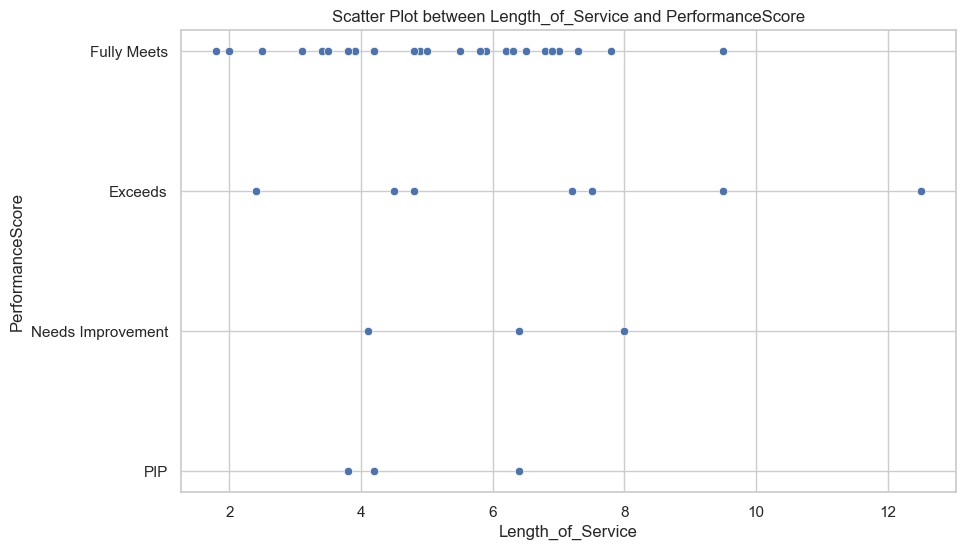

In [18]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 산점도 그리기
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Length_of_Service', y='PerformanceScore', data=manager_director_df)

# 그래프 제목과 레이블 추가
plt.title('Scatter Plot between Length_of_Service and PerformanceScore')
plt.xlabel('Length_of_Service')
plt.ylabel('PerformanceScore')

# 그래프 출력
plt.show()

근속 기간과 성과 평가 점수를 비교해 봤을 때, 확실히 "Fully Meets"가 가장 많이 나타나는 것으로 확인. 

반면 "Needs Improvement"나 PIP(성과 향상 계획)은 각각 3명씩으로 분포가 상대적으로 적은 편.

### **참여도 설문 조사가 미치는 영향**

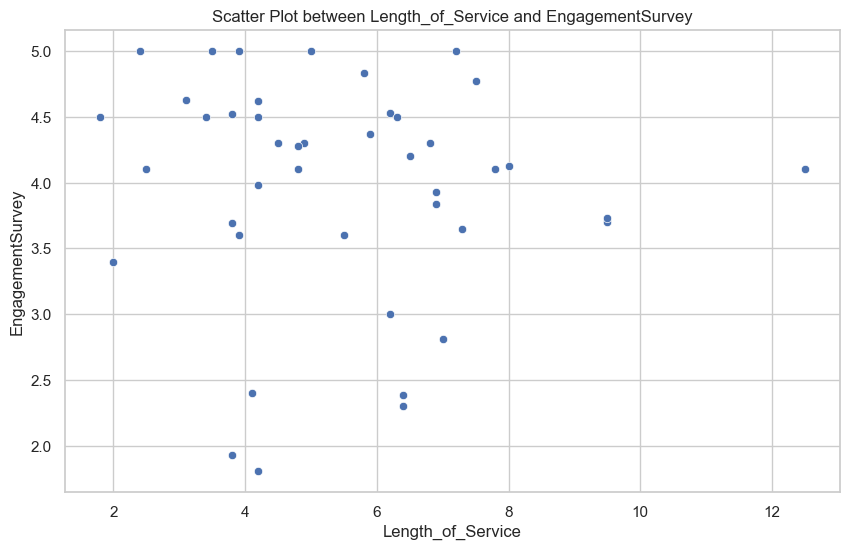

In [19]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 산점도 그리기
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Length_of_Service', y='EngagementSurvey', data=manager_director_df)

# 그래프 제목과 레이블 추가
plt.title('Scatter Plot between Length_of_Service and EngagementSurvey')
plt.xlabel('Length_of_Service')
plt.ylabel('EngagementSurvey')

# 그래프 출력
plt.show()

근속 기간과 참여도 설문 조사 결과를 비교해 보면, 4.0에서 4.5의 비율이 가장 높은 것으로 판단.

### **참여 중인 특별 프로젝트 개수가 미치는 영향**

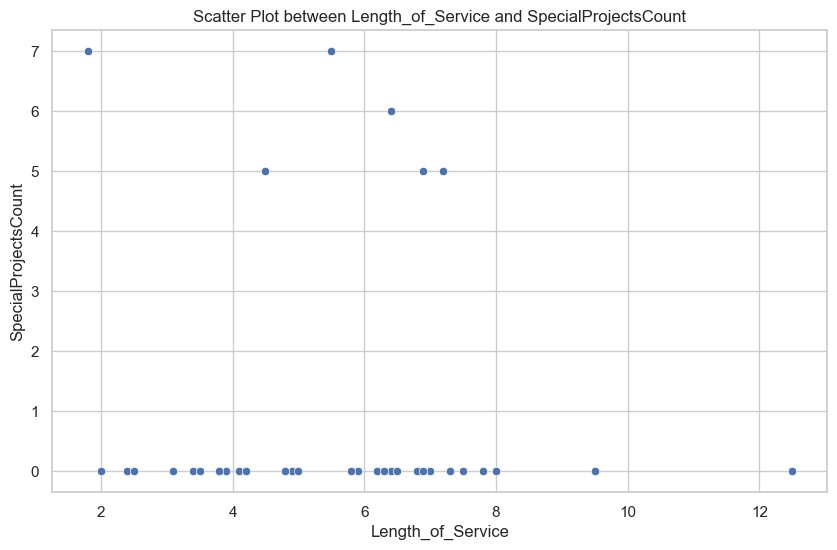

In [20]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 산점도 그리기
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Length_of_Service', y='SpecialProjectsCount', data=manager_director_df)

# 그래프 제목과 레이블 추가
plt.title('Scatter Plot between Length_of_Service and SpecialProjectsCount')
plt.xlabel('Length_of_Service')
plt.ylabel('SpecialProjectsCount')

# 그래프 출력
plt.show()

근속 기간과 참여 중인 특별 프로젝트 개수를 비교해 보면, 

대부분의 직원이 0개의 특별 프로젝트에 참여하고 있어 특별 프로젝트 개수와 승진은 무관한 것으로 판단.

### **최근 성과 평가일이 미치는 영향**

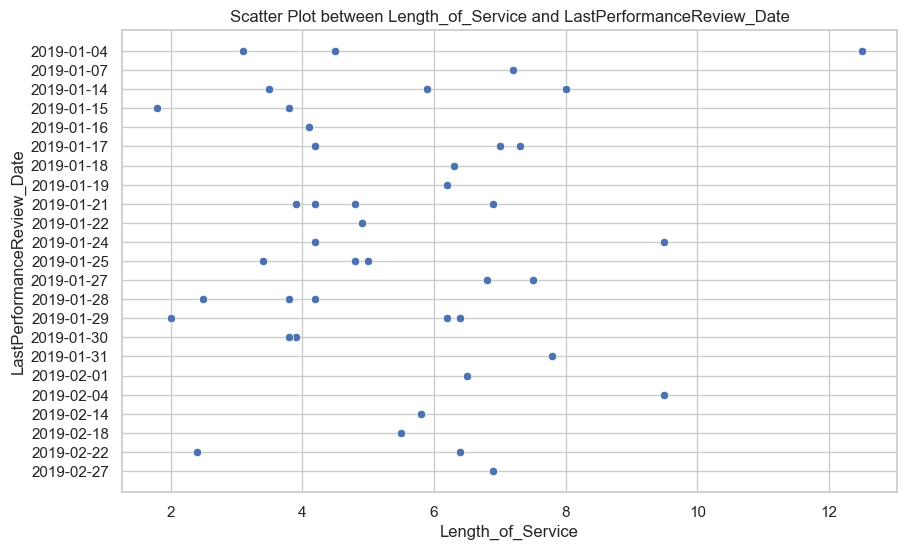

In [21]:
# 데이터프레임을 'LastPerformanceReview_Date' 기준으로 정렬
manager_director_df_sorted = manager_director_df.sort_values(by='LastPerformanceReview_Date')

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 산점도 그리기
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Length_of_Service', y='LastPerformanceReview_Date', data=manager_director_df_sorted)

# 그래프 제목과 레이블 추가
plt.title('Scatter Plot between Length_of_Service and LastPerformanceReview_Date')
plt.xlabel('Length_of_Service')
plt.ylabel('LastPerformanceReview_Date')

# 그래프 출력
plt.show()

근속 기간과 최근 성과 평가일을 비교

최근 성과 평가일은 근속 기간이 짧은 직원들이 많은 것으로 보아, 성과가 많을수록 승진이 빠르다고 판단

### **지난 30일 동안 지각한 일수가 미치는 영향**

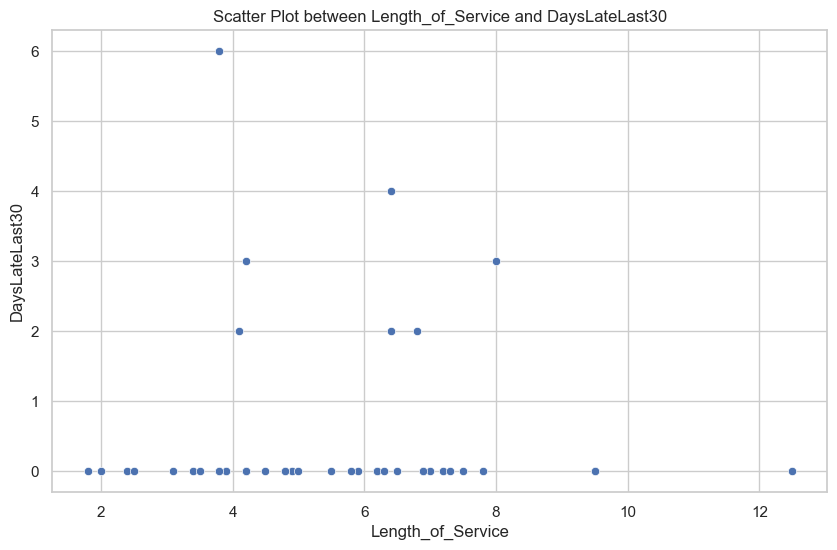

In [22]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 산점도 그리기
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Length_of_Service', y='DaysLateLast30', data=manager_director_df)

# 그래프 제목과 레이블 추가
plt.title('Scatter Plot between Length_of_Service and DaysLateLast30')
plt.xlabel('Length_of_Service')
plt.ylabel('DaysLateLast30')

# 그래프 출력
plt.show()

근속 기간과 지난 30일 동안 지각한 일수를 비교

0개인 직원들이 많은 것으로 보아 지각은 대부분 하지 않는 것으로 판단

### **결근 횟수가 미치는 영향**

C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\4141430333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manager_director_df['Absence_Ratio'] = manager_director_df['Absences'] / manager_director_df['Length_of_Service']


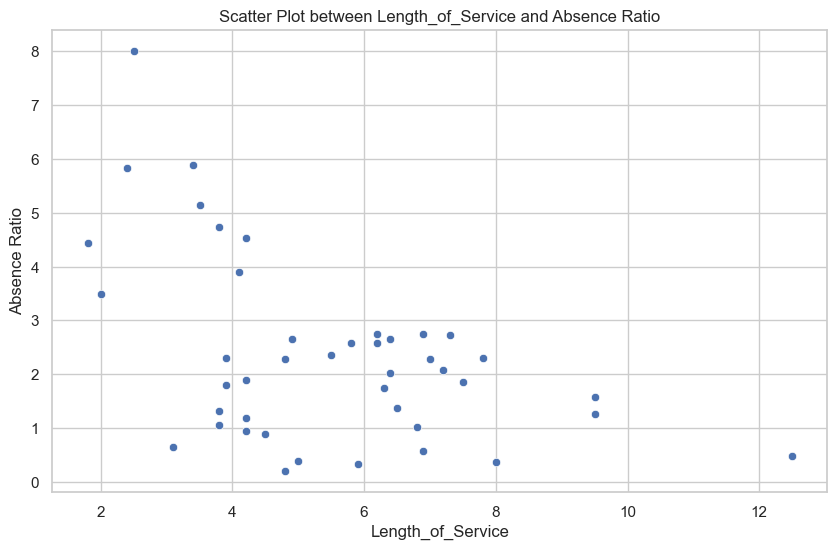

In [23]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 결근 횟수 비율 계산
manager_director_df['Absence_Ratio'] = manager_director_df['Absences'] / manager_director_df['Length_of_Service']

# 산점도 그리기
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Length_of_Service', y='Absence_Ratio', data=manager_director_df)

# 그래프 제목과 레이블 추가
plt.title('Scatter Plot between Length_of_Service and Absence Ratio')
plt.xlabel('Length_of_Service')
plt.ylabel('Absence Ratio')

# 그래프 출력
plt.show()


근속기간과 결근을 파악 단지 결근의 횟수만 파악하면, 근속 기간이 높은 직원들이 불리하기 때문에

결근 / 근속 년도를 통해 데이터를 재설정

결근이 많아도 승진에 영향이 없는것으로 판단

## **회사 외부와 관련된 기준 시각화**

### **결혼 여부에 따른 승진**

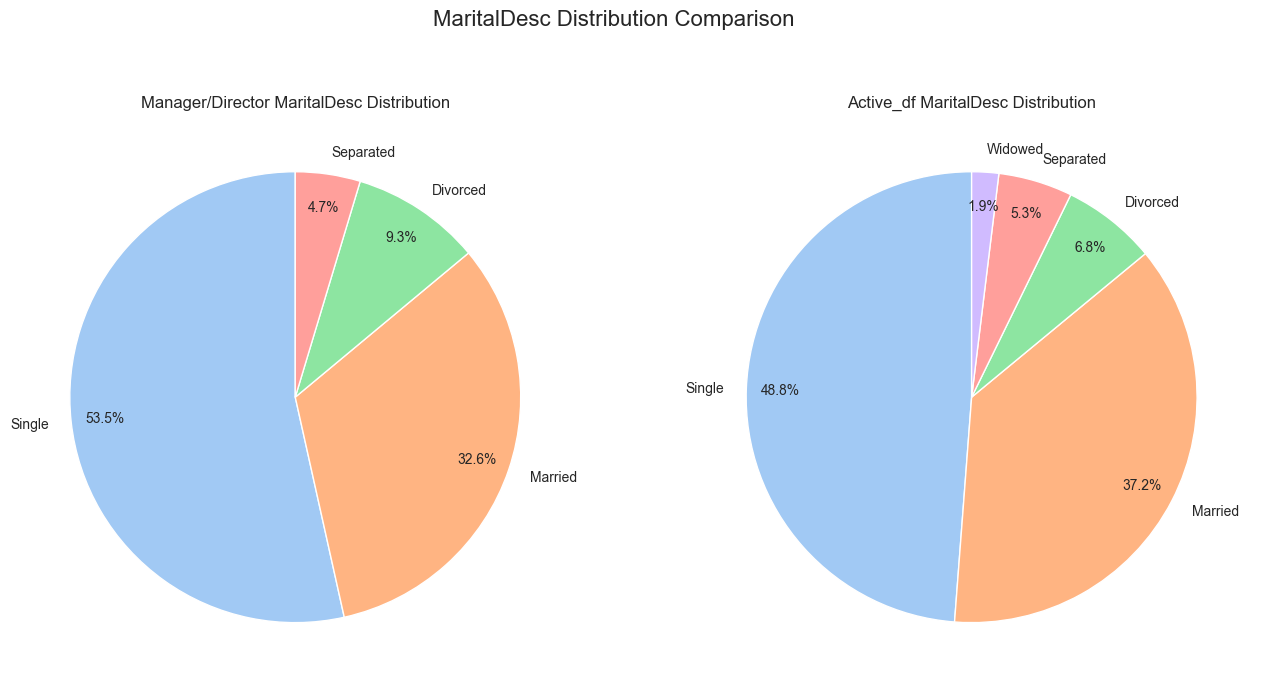

In [24]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 데이터프레임의 MaritalDesc 분포 확인
marital_distribution_manager_director = manager_director_df['MaritalDesc'].value_counts()
marital_distribution_active = active_df['MaritalDesc'].value_counts()

# Subplot 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Manager/Director의 MaritalDesc 원형 그래프
axes[0].pie(marital_distribution_manager_director, labels=marital_distribution_manager_director.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'))
axes[0].set_title('Manager/Director MaritalDesc Distribution')

# Active_df의 MaritalDesc 원형 그래프
axes[1].pie(marital_distribution_active, labels=marital_distribution_active.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'))
axes[1].set_title('Active_df MaritalDesc Distribution')

# 전체 제목 추가
plt.suptitle('MaritalDesc Distribution Comparison', fontsize=16)

# 그래프 출력
plt.show()

승진한 직원들의 비율은 미혼이 single이 53.5%의 절반이 넘는 비율을 차지, 

전체 직원과 비슷한 비율로 봐서는 성별은 승진에 큰 영향을 끼치지 않는 것으로 판단

### **인종에 따른 승진**

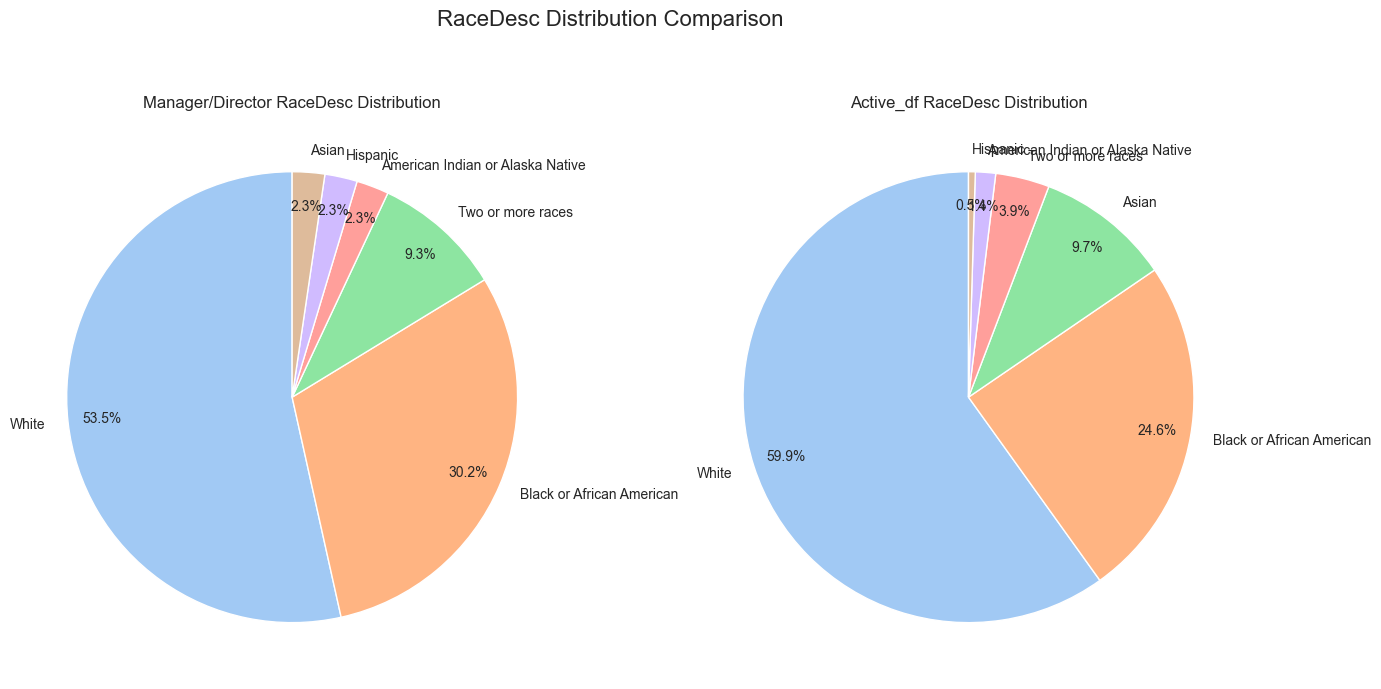

In [25]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 데이터프레임의 RaceDesc 분포 확인
race_distribution_manager_director = manager_director_df['RaceDesc'].value_counts()
race_distribution_active = active_df['RaceDesc'].value_counts()

# Subplot 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Manager/Director의 RaceDesc 원형 그래프
axes[0].pie(race_distribution_manager_director, labels=race_distribution_manager_director.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'))
axes[0].set_title('Manager/Director RaceDesc Distribution')

# Active_df의 RaceDesc 원형 그래프
axes[1].pie(race_distribution_active, labels=race_distribution_active.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'))
axes[1].set_title('Active_df RaceDesc Distribution')

# 전체 제목 추가
plt.suptitle('RaceDesc Distribution Comparison', fontsize=16)

# 그래프 출력
plt.show()


승진한 직원들의 비율은 백인이 single이 53.5%의 절반이 넘는 비율을 차지

전체 직원의 비율과 비슷하기 때문에 인종 또한 큰 영향을 끼치지 않는 것으로 판단

### **시민권 상태에 따른 승진**

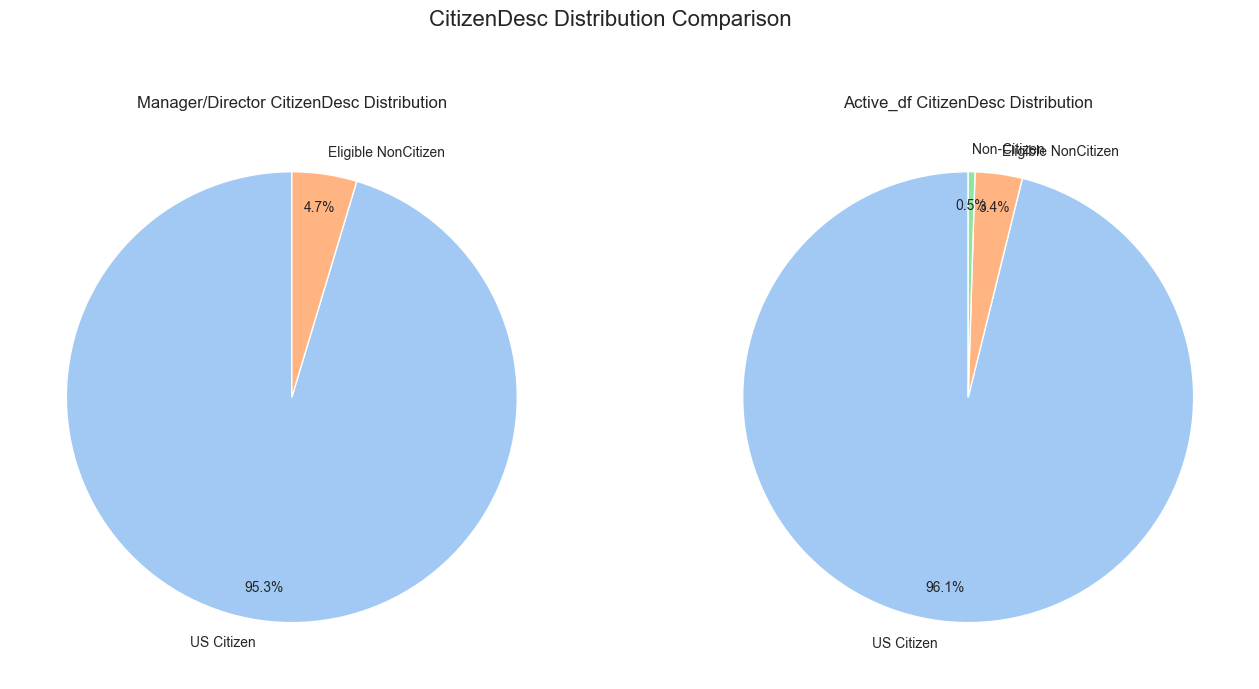

In [26]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 데이터프레임의 CitizenDesc 분포 확인
citizen_distribution_manager_director = manager_director_df['CitizenDesc'].value_counts()
citizen_distribution_active = active_df['CitizenDesc'].value_counts()

# Subplot 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Manager/Director의 CitizenDesc 원형 그래프
axes[0].pie(citizen_distribution_manager_director, labels=citizen_distribution_manager_director.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'))
axes[0].set_title('Manager/Director CitizenDesc Distribution')

# Active_df의 CitizenDesc 원형 그래프
axes[1].pie(citizen_distribution_active, labels=citizen_distribution_active.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'))
axes[1].set_title('Active_df CitizenDesc Distribution')

# 전체 제목 추가
plt.suptitle('CitizenDesc Distribution Comparison', fontsize=16)

# 그래프 출력
plt.show()


승진한 직원중 시민권을 가진 직원이 95.3% 비율을 차지

### **성별에 따른 승진**

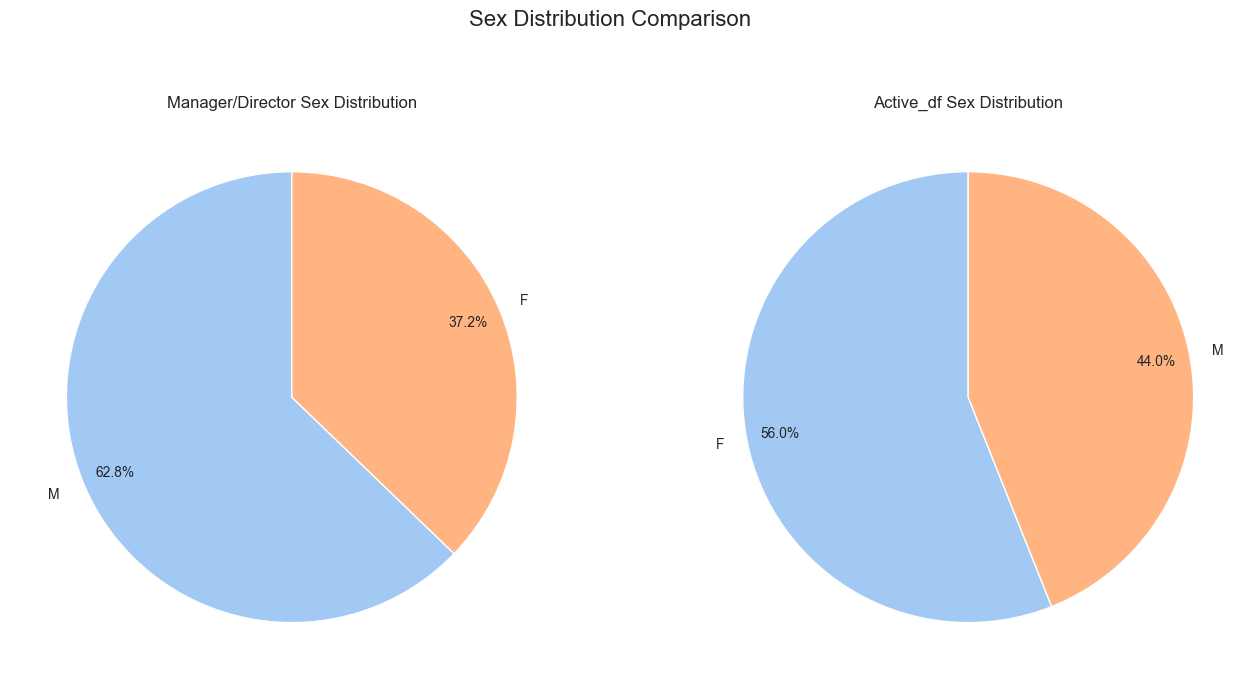

In [27]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 데이터프레임의 Sex 분포 확인
sex_distribution_manager_director = manager_director_df['Sex'].value_counts()
sex_distribution_active = active_df['Sex'].value_counts()

# Subplot 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Manager/Director의 Sex 원형 그래프
axes[0].pie(sex_distribution_manager_director, labels=sex_distribution_manager_director.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'))
axes[0].set_title('Manager/Director Sex Distribution')

# Active_df의 Sex 원형 그래프
axes[1].pie(sex_distribution_active, labels=sex_distribution_active.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'))
axes[1].set_title('Active_df Sex Distribution')

# 전체 제목 추가
plt.suptitle('Sex Distribution Comparison', fontsize=16)

# 그래프 출력
plt.show()


승진한 직원중 62.8%가 남자직원 전체 직원 중 남자 직원은 55.6%로 약 7% 가량 차이가 나는 것으로 확인

IT기업이라 남자직원이 많은 것으로 판단

### **사는 주에 따른 승진**

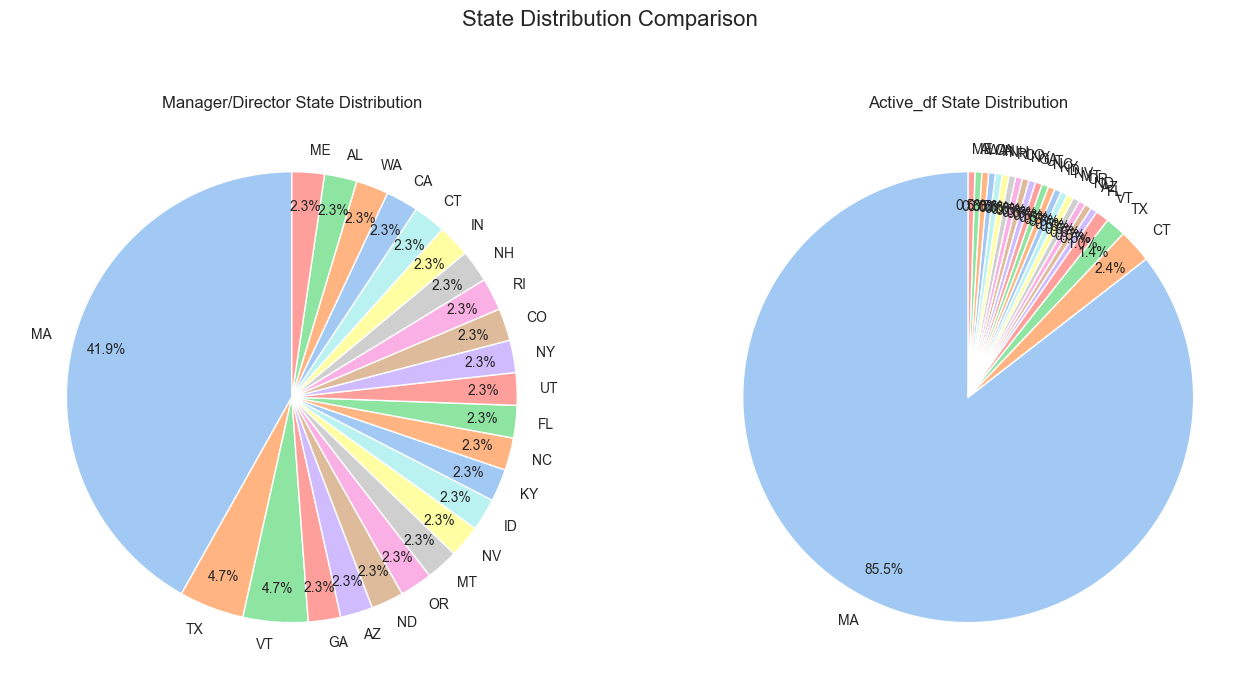

In [28]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 데이터프레임의 State 분포 확인
state_distribution_manager_director = manager_director_df['State'].value_counts()
state_distribution_active = active_df['State'].value_counts()

# Subplot 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Manager/Director의 State 원형 그래프
axes[0].pie(state_distribution_manager_director, labels=state_distribution_manager_director.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'))
axes[0].set_title('Manager/Director State Distribution')

# Active_df의 State 원형 그래프
axes[1].pie(state_distribution_active, labels=state_distribution_active.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'))
axes[1].set_title('Active_df State Distribution')

# 전체 제목 추가
plt.suptitle('State Distribution Comparison', fontsize=16)

# 그래프 출력
plt.show()


승진한 직원중 41.9%가 매사추세츠주에 거주중임 하지만 전체 직원중 85.4%가 매사추세츠주에 거주중인 것을 보아

승진에 사는 곳은 크게 영향을 받지 않는다고 판단

# **3. 승진율 계산하기**

#### 승진 관점
1. 전체 회사 인원(”Active”)의 매년 승진 비율을 10%~12% 가정
2. 각 부서의 인원 수에 따른 승진자의 비율이 조정
3. 승진 점수 기준
    - 'Length_of_Service'
    - 'PerfScoreID'
    - 'SpecialProjectsCount'
    - 'EngagementSurvey'
    - 'percentage_of_absenteeism'

#### 1. 부서별 승진 기준 설정

In [29]:
def cal_promotion_scroe(promotion_df):
    total_score=0
    for i in range(1,7):
        #'PerscoreId : 1~4"로 나뉘어짐
        per_DeptID=promotion_df[promotion_df['DeptID']==i]
        per_DeptID_quantile=per_DeptID.quantile([0.25,0.5,0.75]) 
        indices = promotion_df[promotion_df['DeptID']==i].index ## 인덱스만 추출
        for index in indices:
            total_score=0
            selected_rows = promotion_df.loc[index]
            for i in ['Length_of_Service','PerfScoreID','SpecialProjectsCount','EngagementSurvey','percentage_of_absenteeism']:
                if i=='Length_of_Service': ## 근속 일수가 4년단위로 가산점
                    total_score+=(selected_rows[i]//4)*25
                elif i=='PerfScoreID':      
                    total_score+=selected_rows[i]*25
                else:
                    if selected_rows[i]>0 and selected_rows[i]<=per_DeptID_quantile.loc[0.25,i]:
                        total_score+=25
                    elif selected_rows[i]>per_DeptID_quantile.loc[0.25,i] and selected_rows[i]<=per_DeptID_quantile.loc[0.5,i]:
                        total_score+=50
                    elif selected_rows[i]>per_DeptID_quantile.loc[0.5,i] and selected_rows[i]<=per_DeptID_quantile.loc[0.75,i]:
                        total_score+=75
                    elif selected_rows[i]>per_DeptID_quantile.loc[0.75,i] and selected_rows[i]<=per_DeptID[i].max():
                        total_score+=100
                #print([i,selected_rows[i]],per_DeptID_quantile.loc[0.25,i],per_DeptID_quantile.loc[0.50,i],per_DeptID_quantile.loc[0.75,i],total_score)
            promotion_df.loc[index,'Promotion_score']=total_score

        
# CEO & CIO 제외
active_df=active_df[active_df['Position']!='President & CEO']
active_df=active_df[active_df['Position']!='CIO']

promotion_df=active_df[['EmpID','DeptID','PerfScoreID','SpecialProjectsCount','EngagementSurvey','Absences','Length_of_Service','Length_of_Service_Day']]

# 결근 비율 구하기
promotion_df['percentage_of_absenteeism'] = (promotion_df['Absences'] / promotion_df['Length_of_Service_Day']) * 100
# 'Length_of_Service'가 0인 경우에 대한 예외 처리
promotion_df['percentage_of_absenteeism'] = promotion_df['percentage_of_absenteeism'].replace([np.inf, -np.inf], np.nan)

cal_promotion_scroe(promotion_df)

C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\3817861743.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promotion_df['percentage_of_absenteeism'] = (promotion_df['Absences'] / promotion_df['Length_of_Service_Day']) * 100
C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\3817861743.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promotion_df['percentage_of_absenteeism'] = promotion_df['percentage_of_absenteeism'].replace([np.inf, -np.inf], np.nan)
C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\38

C:\Users\fxpow\AppData\Local\Temp\ipykernel_376\1164950100.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DeptID', data=promotion_df, palette='pastel')


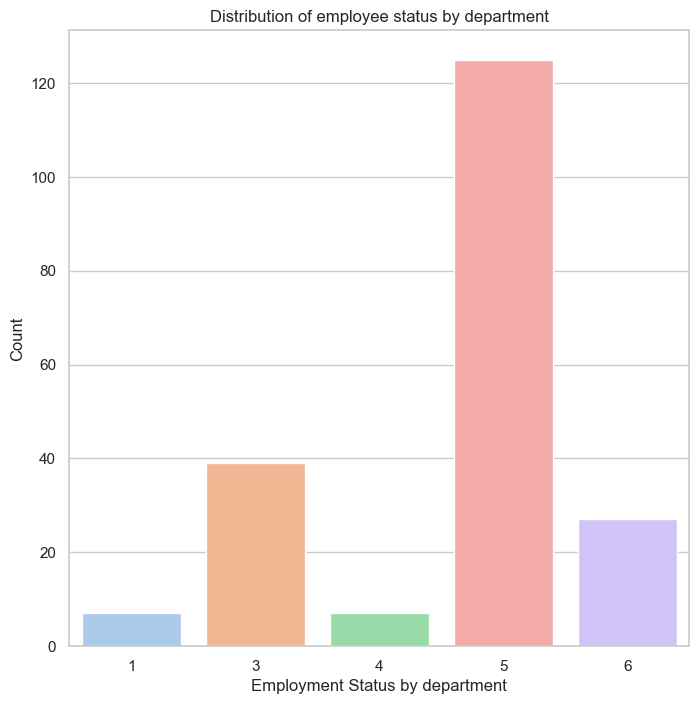

In [30]:
# 부서별 인원 현황
status_counts = promotion_df['DeptID'].value_counts()

# 시각화
plt.figure(figsize=(8, 8))
sns.countplot(x='DeptID', data=promotion_df, palette='pastel')

plt.title('Distribution of employee status by department')
plt.xlabel('Employment Status by department')
plt.ylabel('Count')

plt.show()

#### 부서 별 승진 점수 평균 값으로 보았을 경우

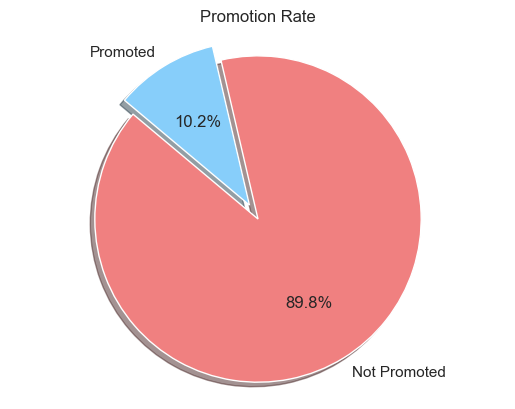

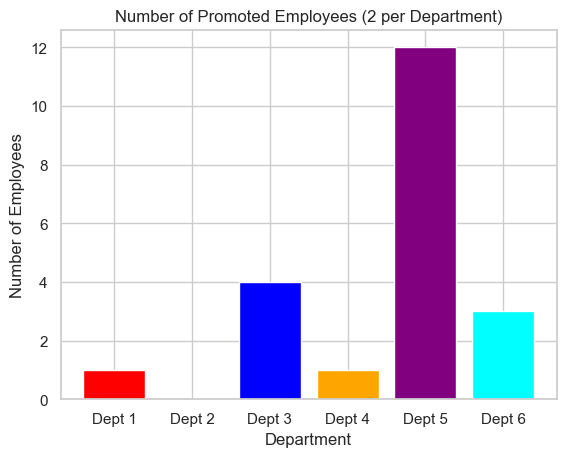

In [31]:
total_active_employees=active_df['DeptID'].value_counts().sum() ## 회사 총 직원 
total_Promotion_count=0
per_Promotion_count=[] ##부서별 승진 인원
company_target_promotion_count=round(total_active_employees*0.1,0) ## 회사 승진 인원 타겟
list_of_promotion=[] ## 승진자 리스트


for i in range(1,7):
    ## 부서별 할댱된 승진 인원
    Number_of_promotions_by_DeptID=int(round(company_target_promotion_count*round(len(promotion_df[promotion_df['DeptID']==i])/total_active_employees,2),0))
    
    per_DeptID_df=promotion_df[promotion_df['DeptID']==i]
    
    for Number in range(0,Number_of_promotions_by_DeptID):
        if i==2:
            list_of_promotion.append(0)
        else:
            high_per_DeptID_df=per_DeptID_df.sort_values(by='Promotion_score', ascending=False).iloc[Number]
            high_per_DeptID_df['Promotion_score']
            list_of_promotion.append(high_per_DeptID_df)

df_list_of_promotion = pd.concat(list_of_promotion, axis=1).transpose()  # 최종 승진자 명단

for i in range(1,7):
    per_Promotion_count.append(len(df_list_of_promotion[df_list_of_promotion['DeptID']==i]))

# 파이 차트 생성
labels = ['Not Promoted', 'Promoted']
sizes = [total_active_employees - sum(per_Promotion_count), sum(per_Promotion_count)]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # "Promoted" 부분을 약간 벌립니다.

# 파이 차트 그리기
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Promotion Rate')
plt.show()

categories = ['Dept 1', 'Dept 2', 'Dept 3', 'Dept 4', 'Dept 5', 'Dept 6']
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']  # 각 부서별로 지정한 색상

plt.bar(categories, per_Promotion_count, color=colors)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Number of Promoted Employees (2 per Department)')

plt.show()


In [32]:
df_list_of_promotion.describe()

,EmpID,DeptID,PerfScoreID,SpecialProjectsCount,EngagementSurvey,Absences,Length_of_Service,Length_of_Service_Day,percentage_of_absenteeism,Promotion_score
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,10077.047619,4.523810,3.285714,1.761905,4.903333,14.619048,4.757143,1734.523810,1.004421,302.380952
std,74.353531,1.249762,0.462910,2.861901,0.168117,4.018410,1.896727,690.804938,0.630175,22.227182
min,10001.000000,1.000000,3.000000,0.000000,4.500000,3.000000,1.400000,514.000000,0.176367,275.000000
25%,10021.000000,4.000000,3.000000,0.000000,4.810000,14.000000,3.700000,1337.000000,0.707651,300.000000
50%,10067.000000,5.000000,3.000000,0.000000,5.000000,15.000000,4.700000,1701.000000,0.840336,300.000000
75%,10085.000000,5.000000,4.000000,6.000000,5.000000,17.000000,6.000000,2191.000000,1.196709,300.000000
max,10250.000000,6.000000,4.000000,7.000000,5.000000,20.000000,9.700000,3542.000000,3.307393,350.000000
